# Spam Engine Model
Nimit Shah

In this project we are to implement a model that classifies a message to be spam or ham. We process the data/message to clean and tokenize it. We create a bag of words from the vocab list extracted by running through all the words in every messages. A sparse matrix ois created using the indexes and count. We combine the sparse matrix and the true label from the dataset. After that we divide the combined data into train and test dataset. We train our Logistic Regression model using the train dataset. The predictions of the label are calculated for the test dataset. The true label and the predicted label are comapred and the accuracy of the model is calculated.

In [44]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter 
from nltk.stem import WordNetLemmatizer
import pickle

In [2]:
#Loading the dataset
df = pd.read_csv('spam_email.csv')

#Printing the sample fo dataset
df.head()

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6


In [3]:
#Renaming the columns
df.rename(columns = {"CATEGORY": 'Label', "MESSAGE": 'Email'}, inplace=True)

#Checking the count of 'ham' and 'spam'
df['Label'].value_counts()

0    3900
1    1896
Name: Label, dtype: int64

In [4]:
#Printing the shape of the dataset
print('df.shape',df.shape)

#Printing the count null values
print('Null Values: \n',df.isnull().sum())

df.shape (5796, 3)
Null Values: 
 Label        0
Email        0
FILE_NAME    0
dtype: int64


### Tokenizing and Lemmeting the messages

In [5]:
#Definening function for processing message
def process_text(text):
    #Initializing a set for all Unique words from the data
    unique_words = set()
    no_punc = [char for char in text if char not in string.punctuation]  #Removing the punctuations from the message
    no_punc = ''.join(no_punc)
    clean_words = [word.lower() for word in no_punc.split() if word.lower() not in stopwords.words('english')]  #Removing the stopwords from the message
    lemmet = WordNetLemmatizer()
    lemmet_words = [lemmet.lemmatize(word1) for word1 in clean_words] #Lemmeting the words in the message
    for i in lemmet_words:
        unique_words.add(i)

    for index,word in enumerate(sorted(list(unique_words))):
        vocab_dict[word] = index 
    return(lemmet_words)

In [6]:
#Initializing a dictionary for storing the words and indexes
vocab_dict = {}
#Calling the function for 'Email' in all the rows in the dataframe
vocab_list = df['Email'].apply(process_text)

### Implementing CountVectorizer

In [7]:
from scipy.sparse import csr_matrix
#Initializing lists
row, col, val = [], [], []

#for loop to itterate through list of lemmeted words of the messages
for idx, sent in enumerate(vocab_list):

    count_word = dict(Counter(sent)) #Counts the occurrence of every word in each message
    
    for word, count in count_word.items(): #Itterates through all the words from the dictionary(Count_words)
        col_index = vocab_dict.get(word) #Gets the index of the word from vocab_dict
        if col_index >= 0:
            row.append(idx)
            col.append(col_index)
            val.append(count)
        

In [8]:
#Combies all the indexes and values into a sparse matrix.
message_bow = csr_matrix((val, (row,col)), shape=(len(df['Email']),len(vocab_list)))

In [9]:
from sklearn.model_selection import train_test_split
#Splitiing the sparse matrix into test and train dataset
X_train, X_test, y_train, y_test = train_test_split(message_bow, df['Label'], test_size = 0.20, random_state = 0)

### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
#Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train) #Training the model using train dataset.
pred_train = logreg.predict(X_train) #Calculating predictions for the train input
pred_test = logreg.predict(X_test) #Calculating predictions for the test input

C:\Users\nimit\anaconda3\envs\Spam_engine\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score

#Calculating accuracy, confusion matrix and classification report
train_acc = accuracy_score(y_train, pred_train)
conf_mat_train = confusion_matrix(y_train, pred_train)
cls_report_train = classification_report(y_train,pred_train)
precison_train = precision_score(y_train,pred_train)

In [35]:
print('Classification Report:')
print(cls_report_train)
print()
print('Accuracy for train Dataset:', round(train_acc * 100, 3))
print('Precision Score for train:', precison_train)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3102
           1       0.98      0.95      0.96      1534

    accuracy                           0.98      4636
   macro avg       0.98      0.97      0.97      4636
weighted avg       0.98      0.98      0.98      4636


Accuracy for train Dataset: 97.606
Precision Score for train: 0.9817197020988491


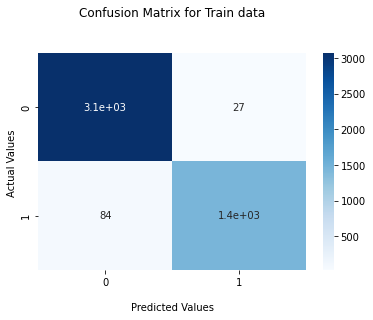

In [36]:
import seaborn as sns

# Plotting the confusion matrix
ax = sns.heatmap(conf_mat_train, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for Train data\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

In [37]:
#Calculating accuracy, confusion matrix and classification report
test_acc = accuracy_score(y_test, pred_test)
conf_mat_test = confusion_matrix(y_test, pred_test)
cls_report_test = classification_report(y_test,pred_test)
precison_test = precision_score(y_test,pred_test)

In [38]:
print('Classification Report:')
print(classification_report(y_test,pred_test))
print()
print('Accuracy for test Dataset:', round(test_acc * 100, 3))
print('Precision Score for test:', precison_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       798
           1       0.92      0.90      0.91       362

    accuracy                           0.94      1160
   macro avg       0.94      0.93      0.93      1160
weighted avg       0.94      0.94      0.94      1160


Accuracy for test Dataset: 94.397
Precision Score for test: 0.9159663865546218


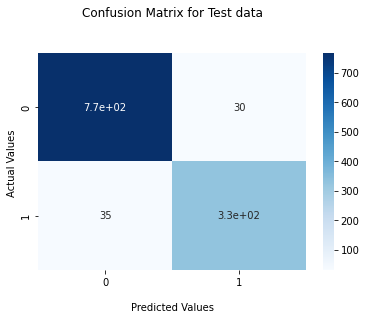

In [39]:
# Plotting the confusion matrix
ax1 = sns.heatmap(conf_mat_test, annot=True, cmap='Blues')

ax1.set_title('Confusion Matrix for Test data\n\n');
ax1.set_xlabel('\nPredicted Values')
ax1.set_ylabel('Actual Values ');